In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [4]:
image_path = "../output_videos/cropped_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

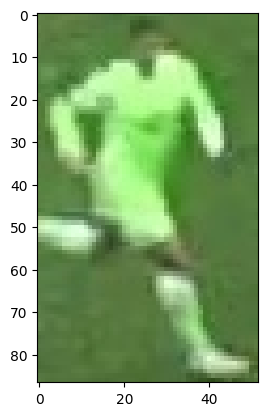

In [5]:
plt.imshow(image)
plt.show()

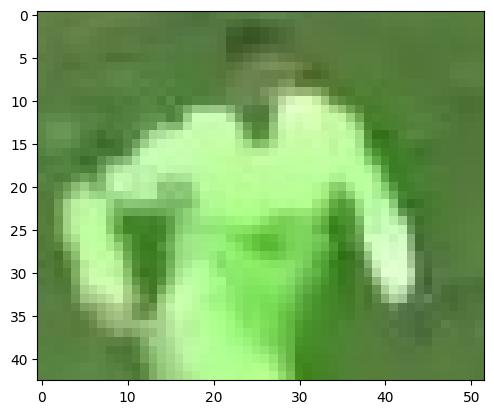

In [6]:
#take top half of the image
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

In [10]:
## reshape image to 2d array

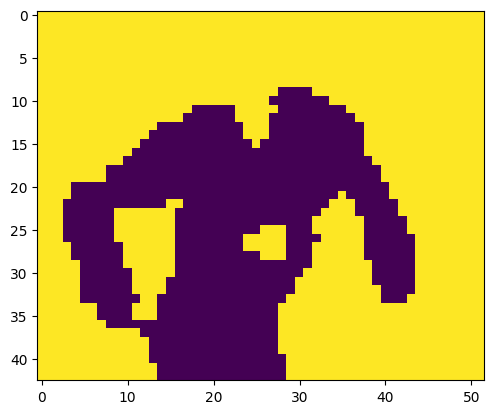

In [8]:
#reshape image to 2d array
image_2d = top_half_image.reshape(-1,3)

kmeans = KMeans(n_clusters=2, random_state = 0)
kmeans.fit(image_2d)

#get clusters labels
labels = kmeans.labels_

#reshape again to img

clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])
plt.imshow(clustered_image)
plt.show()


In [11]:
corner_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key= corner_clusters.count)
print(non_player_cluster)

1


In [12]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [13]:
kmeans.cluster_centers_[player_cluster]

array([170.8976378 , 235.20472441, 142.332021  ])